In [242]:
import pandas as pd

df = pd.read_csv('data.csv')
df

,File,Subjects,Keywords,Cited-by-count
0,202202161.json,AGRI;VETE;BIOC,Microencapsulation;Basil Oil;Performance;Broil...,2.0
1,202202531.json,MEDI,care delivery;neurocritical care;resources;COV...,2.0
2,202203770.json,NEUR,Partial Least Squares (PLS) analysis;neurocogn...,0.0
3,202202862.json,PHYS,NaN,0.0
4,202203320.json,MEDI,Cardiorespiratory function;Bra;Metabolism,0.0
...,...,...,...,...
20211,201802218.json,COMP,Landsat 8;NDVI;Sentinel-2;Remote sensing;Actua...,0.0
20212,201800225.json,MULT,NaN,27.0
20213,201802648.json,MEDI,Rehabilitation;Transcranial direct current sti...,7.0
20214,201800675.json,VETE,Canine cognitive dysfunction syndrome;Thailand...,1.0


In [243]:
df2 = df.dropna()
df2['Subjects']

0        AGRI;VETE;BIOC
1                  MEDI
2                  NEUR
4                  MEDI
5                  AGRI
              ...      
20208         PSYC;SOCI
20210              MEDI
20211              COMP
20213              MEDI
20214              VETE
Name: Subjects, Length: 16408, dtype: object

In [244]:


# Example data (replace with your actual DataFrame)
data = {
    "Subjects": df2['Subjects']}
df3 = pd.DataFrame(data)

# Step 1: Split the Subjects column into individual categories
df3['Subjects_split'] = df3['Subjects'].str.split(';')

# Step 2: Explode the lists into separate rows
exploded_df = df3.explode('Subjects_split')

# Step 3: Create dummy variables for the exploded column
dummy_df = pd.get_dummies(exploded_df['Subjects_split'])

# Step 4: Aggregate the dummy variables back to the original DataFrame
# Group by the original DataFrame's index
dummy_df = dummy_df.groupby(exploded_df.index).sum()

# Step 5: Combine the dummy-coded columns with the original DataFrame
df3 = pd.concat([df3, dummy_df], axis=1)

# Drop the intermediate column if you no longer need it
df3 = df3.drop(columns=['Subjects_split'])

df3

,Subjects,AGRI,ARTS,BIOC,BUSI,CENG,CHEM,COMP,DECI,DENT,...,MATH,MEDI,MULT,NEUR,NURS,PHAR,PHYS,PSYC,SOCI,VETE
0,AGRI;VETE;BIOC,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,MEDI,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,NEUR,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,MEDI,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,AGRI,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20208,PSYC;SOCI,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
20210,MEDI,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
20211,COMP,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
20213,MEDI,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [245]:
df4 = pd.concat([df2,df3.drop(columns=['Subjects'])], axis=1)

In [246]:
df4.head()

,File,Subjects,Keywords,Cited-by-count,AGRI,ARTS,BIOC,BUSI,CENG,CHEM,...,MATH,MEDI,MULT,NEUR,NURS,PHAR,PHYS,PSYC,SOCI,VETE
0,202202161.json,AGRI;VETE;BIOC,Microencapsulation;Basil Oil;Performance;Broil...,2.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,202202531.json,MEDI,care delivery;neurocritical care;resources;COV...,2.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,202203770.json,NEUR,Partial Least Squares (PLS) analysis;neurocogn...,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,202203320.json,MEDI,Cardiorespiratory function;Bra;Metabolism,0.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,202201608.json,AGRI,tropical rainforest;Ichneumonoidea;insect-frui...,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [247]:
df5= pd.DataFrame(df4['Keywords'])

df5

,Keywords
0,Microencapsulation;Basil Oil;Performance;Broil...
1,care delivery;neurocritical care;resources;COV...
2,Partial Least Squares (PLS) analysis;neurocogn...
4,Cardiorespiratory function;Bra;Metabolism
5,tropical rainforest;Ichneumonoidea;insect-frui...
...,...
20208,National prevalence;Intimate partner violence;...
20210,therapeutic hypothermia;neurological prognosti...
20211,Landsat 8;NDVI;Sentinel-2;Remote sensing;Actua...
20213,Rehabilitation;Transcranial direct current sti...


In [248]:
from gensim.models import Word2Vec
import numpy as np


In [249]:

# Step 1: Split sentences into words using semicolon
df5['Tokenized'] = df5["Keywords"].apply(lambda x: x.split(';'))

df5



,Keywords,Tokenized
0,Microencapsulation;Basil Oil;Performance;Broil...,"[Microencapsulation, Basil Oil, Performance, B..."
1,care delivery;neurocritical care;resources;COV...,"[care delivery, neurocritical care, resources,..."
2,Partial Least Squares (PLS) analysis;neurocogn...,"[Partial Least Squares (PLS) analysis, neuroco..."
4,Cardiorespiratory function;Bra;Metabolism,"[Cardiorespiratory function, Bra, Metabolism]"
5,tropical rainforest;Ichneumonoidea;insect-frui...,"[tropical rainforest, Ichneumonoidea, insect-f..."
...,...,...
20208,National prevalence;Intimate partner violence;...,"[National prevalence, Intimate partner violenc..."
20210,therapeutic hypothermia;neurological prognosti...,"[therapeutic hypothermia, neurological prognos..."
20211,Landsat 8;NDVI;Sentinel-2;Remote sensing;Actua...,"[Landsat 8, NDVI, Sentinel-2, Remote sensing, ..."
20213,Rehabilitation;Transcranial direct current sti...,"[Rehabilitation, Transcranial direct current s..."


In [250]:

# Step 2: Train Word2Vec model
# Create a Word2Vec model using the tokenized column
w2v_model = Word2Vec(sentences=df5['Tokenized'], vector_size=10, window=5, min_count=1, workers=4)

# Step 3: Convert words to vectors
def row_to_vector(row, model):
    vectors = []
    for word in row:
        if word in model.wv:
            vectors.append(model.wv[word])
    if vectors:
        # Average the vectors for the row
        return np.mean(vectors, axis=0)
    else:
        # Return a zero vector if no words were in the vocabulary
        return np.zeros(model.vector_size)

df5['Vector'] = df5['Tokenized'].apply(lambda x: row_to_vector(x, w2v_model))

# Step 4: Save or use the vectors
print(df5[['Keywords', 'Vector']])


                                                Keywords  \
0      Microencapsulation;Basil Oil;Performance;Broil...   
1      care delivery;neurocritical care;resources;COV...   
2      Partial Least Squares (PLS) analysis;neurocogn...   
4              Cardiorespiratory function;Bra;Metabolism   
5      tropical rainforest;Ichneumonoidea;insect-frui...   
...                                                  ...   
20208  National prevalence;Intimate partner violence;...   
20210  therapeutic hypothermia;neurological prognosti...   
20211  Landsat 8;NDVI;Sentinel-2;Remote sensing;Actua...   
20213  Rehabilitation;Transcranial direct current sti...   
20214  Canine cognitive dysfunction syndrome;Thailand...   

                                                  Vector  
0      [0.01909691, -0.023477787, 0.01779866, -0.0325...  
1      [0.0034455229, 0.023465157, -0.018640747, 0.00...  
2      [0.023519313, -0.0053860703, 0.0054198424, -0....  
4      [0.02645006, 0.013062063, 0.02312331

In [251]:

df5.head()

,Keywords,Tokenized,Vector
0,Microencapsulation;Basil Oil;Performance;Broil...,"[Microencapsulation, Basil Oil, Performance, B...","[0.01909691, -0.023477787, 0.01779866, -0.0325..."
1,care delivery;neurocritical care;resources;COV...,"[care delivery, neurocritical care, resources,...","[0.0034455229, 0.023465157, -0.018640747, 0.00..."
2,Partial Least Squares (PLS) analysis;neurocogn...,"[Partial Least Squares (PLS) analysis, neuroco...","[0.023519313, -0.0053860703, 0.0054198424, -0...."
4,Cardiorespiratory function;Bra;Metabolism,"[Cardiorespiratory function, Bra, Metabolism]","[0.02645006, 0.013062063, 0.023123316, 0.00901..."
5,tropical rainforest;Ichneumonoidea;insect-frui...,"[tropical rainforest, Ichneumonoidea, insect-f...","[0.028729504, -0.008294464, -0.04034218, -0.03..."


In [252]:
df5["Vector"].iloc[0].mean()

-0.0044116387

In [253]:
df5['Mean'] = df5['Vector'].apply(lambda x: x.mean())
df5['Vector'].head()

0    [0.01909691, -0.023477787, 0.01779866, -0.0325...
1    [0.0034455229, 0.023465157, -0.018640747, 0.00...
2    [0.023519313, -0.0053860703, 0.0054198424, -0....
4    [0.02645006, 0.013062063, 0.023123316, 0.00901...
5    [0.028729504, -0.008294464, -0.04034218, -0.03...
Name: Vector, dtype: object

In [254]:
df6 = pd.concat([df4,df5['Mean']], axis=1)

In [255]:

df6.head()


,File,Subjects,Keywords,Cited-by-count,AGRI,ARTS,BIOC,BUSI,CENG,CHEM,...,MEDI,MULT,NEUR,NURS,PHAR,PHYS,PSYC,SOCI,VETE,Mean
0,202202161.json,AGRI;VETE;BIOC,Microencapsulation;Basil Oil;Performance;Broil...,2.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,-0.004412
1,202202531.json,MEDI,care delivery;neurocritical care;resources;COV...,2.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,-0.003056
2,202203770.json,NEUR,Partial Least Squares (PLS) analysis;neurocogn...,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,-0.010347
4,202203320.json,MEDI,Cardiorespiratory function;Bra;Metabolism,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,-0.003339
5,202201608.json,AGRI,tropical rainforest;Ichneumonoidea;insect-frui...,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.017373


In [256]:
df6.loc[df6['Subjects']=="COMP"].sort_values(by="Mean")

,File,Subjects,Keywords,Cited-by-count,AGRI,ARTS,BIOC,BUSI,CENG,CHEM,...,MEDI,MULT,NEUR,NURS,PHAR,PHYS,PSYC,SOCI,VETE,Mean
17889,201800616.json,COMP,Gaussian normal basis;bit-parallel multiplier;...,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.030728
9386,201901064.json,COMP,Dynamic time warping;Time series classificatio...,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.029099
18099,201800964.json,COMP,Identical parallel machines;Vehicle routing pr...,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.023874
9932,201900331.json,COMP,Drug delivery;Primary human corneal epithelial...,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.019516
8832,201900072.json,COMP,Formal model;Priority Queue;Generalized Stocha...,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.018712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7029,202302580.json,COMP,education game;solar system;4th grade students,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.019248
20194,201801199.json,COMP,Financial performance graphs;International inv...,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.019317
18276,201800294.json,COMP,Reading Comprehensive;Instruction design;Learn...,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.021332
8428,201900529.json,COMP,Recommender Systems;Rating Conversion;Collabor...,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.021491


In [257]:
df6 = df5.drop(columns="Mean", inplace=True)

In [258]:
df4.head(1)

,File,Subjects,Keywords,Cited-by-count,AGRI,ARTS,BIOC,BUSI,CENG,CHEM,...,MATH,MEDI,MULT,NEUR,NURS,PHAR,PHYS,PSYC,SOCI,VETE
0,202202161.json,AGRI;VETE;BIOC,Microencapsulation;Basil Oil;Performance;Broil...,2.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [259]:
df6 = df5.drop(columns=['Tokenized', 'Keywords'])

In [260]:
df6

,Vector
0,"[0.01909691, -0.023477787, 0.01779866, -0.0325..."
1,"[0.0034455229, 0.023465157, -0.018640747, 0.00..."
2,"[0.023519313, -0.0053860703, 0.0054198424, -0...."
4,"[0.02645006, 0.013062063, 0.023123316, 0.00901..."
5,"[0.028729504, -0.008294464, -0.04034218, -0.03..."
...,...
20208,"[-0.024568997, 0.031711005, 0.0052809613, 0.02..."
20210,"[0.034409143, 0.013537745, -0.02227288, 0.0238..."
20211,"[-0.005900502, 0.02959711, 0.021080734, 0.0682..."
20213,"[-0.0014621532, 0.02252528, 0.039858833, -0.01..."


In [261]:
df7 = pd.concat([df4,df6], axis=1)
X = df7.drop(columns=['File','Subjects','Keywords','Cited-by-count'])
X.head()

,AGRI,ARTS,BIOC,BUSI,CENG,CHEM,COMP,DECI,DENT,EART,...,MEDI,MULT,NEUR,NURS,PHAR,PHYS,PSYC,SOCI,VETE,Vector
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,"[0.01909691, -0.023477787, 0.01779866, -0.0325..."
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,"[0.0034455229, 0.023465157, -0.018640747, 0.00..."
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,"[0.023519313, -0.0053860703, 0.0054198424, -0...."
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,"[0.02645006, 0.013062063, 0.023123316, 0.00901..."
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[0.028729504, -0.008294464, -0.04034218, -0.03..."


In [262]:
vector_expanded = pd.DataFrame(X['Vector'].tolist(), index=X.index)
vector_expanded.columns = [f'Vector_{i}' for i in range(vector_expanded.shape[1])]
df_expanded = pd.concat([X.drop(columns=['Vector']), vector_expanded], axis=1)
df_expanded.loc[df_expanded["COMP"] == 1]


,AGRI,ARTS,BIOC,BUSI,CENG,CHEM,COMP,DECI,DENT,EART,...,Vector_0,Vector_1,Vector_2,Vector_3,Vector_4,Vector_5,Vector_6,Vector_7,Vector_8,Vector_9
9,0,0,0,0,0,0,1,0,0,0,...,0.019158,0.009781,0.002142,-0.002989,0.035343,0.012746,0.045876,-0.007112,-0.022691,-0.004166
14,0,0,0,0,0,0,1,0,0,0,...,-0.033678,-0.006967,0.028553,-0.029940,0.020738,0.061457,-0.001243,-0.051931,0.041611,0.019634
39,0,0,0,0,0,0,1,0,0,0,...,-0.036396,0.040091,0.007088,-0.001776,-0.041081,0.018127,0.016048,0.033796,-0.006165,-0.017174
42,0,0,0,0,0,0,1,0,0,0,...,-0.038505,-0.055274,0.053961,-0.016944,-0.058022,0.032548,-0.072561,-0.028572,0.011443,-0.003682
49,0,0,1,0,0,1,1,0,0,0,...,-0.027581,-0.001012,0.000476,0.019624,-0.001624,0.016672,-0.000422,0.020049,-0.005066,0.022936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20171,0,0,0,0,0,0,1,0,0,0,...,-0.050006,0.032350,0.015609,0.009388,-0.017457,-0.001156,0.027878,0.045919,0.039820,0.017191
20183,0,0,0,1,0,0,1,1,0,0,...,-0.002794,0.019604,-0.038900,-0.003974,0.026120,0.042898,-0.023691,0.052971,0.000340,-0.076224
20191,0,0,0,0,0,0,1,0,0,0,...,0.019889,0.069392,0.005643,-0.000647,0.003488,-0.028524,-0.005755,0.004585,0.064881,0.005442
20194,0,0,0,0,0,0,1,0,0,0,...,0.019390,-0.001957,0.005867,0.019912,0.007278,0.059839,0.021193,0.011966,0.014489,0.035192


In [263]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5, algorithm='brute')
neigh.fit(df_expanded.loc[df_expanded["COMP"] == 1])

NearestNeighbors(algorithm='brute')

Distances to neighbors: [[0.         1.73982408 1.95311937 1.96757652 1.99418226]]
Indices of neighbors: [[   0  772 1278  657  540]]


/var/folders/h3/pwlyvdxs71v5yn4z60q6qlv40000gn/T/ipykernel_60105/3820832355.py:18: RuntimeWarning: invalid value encountered in log1p
  plt.scatter(np.log1p(features_2d[:, 0]), np.log1p(features_2d[:, 1]), alpha=0.6, label="Data Points")


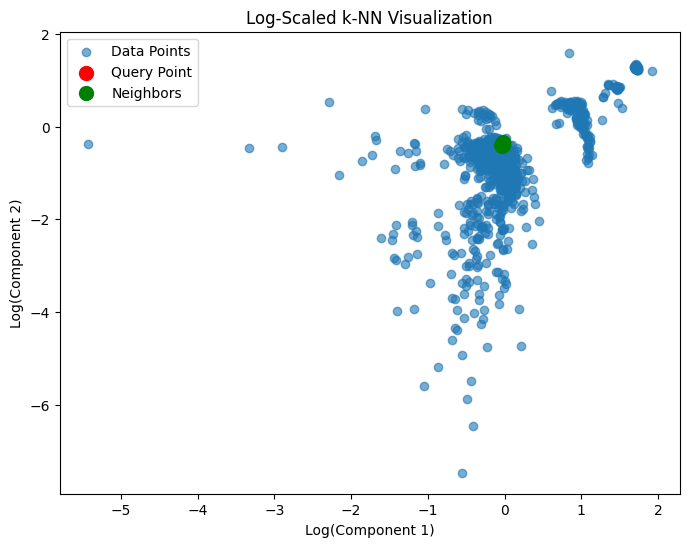

In [264]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df_expanded.loc[df_expanded["COMP"] == 1])
n_neighbors = 5
knn = NearestNeighbors(n_neighbors=n_neighbors, algorithm='brute')
knn.fit(features_scaled)
distances, indices = knn.kneighbors([features_scaled[0]])
print("Distances to neighbors:", distances)
print("Indices of neighbors:", indices)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_scaled)
query_point = features_2d[0]
neighbors = features_2d[indices[0]]
plt.figure(figsize=(8, 6))
plt.scatter(np.log1p(features_2d[:, 0]), np.log1p(features_2d[:, 1]), alpha=0.6, label="Data Points")
plt.scatter(np.log1p(query_point[0]), np.log1p(query_point[1]), color='red', label='Query Point', s=100)
plt.scatter(np.log1p(neighbors[:, 0]), np.log1p(neighbors[:, 1]), color='green', label='Neighbors', s=100)
plt.title('Log-Scaled k-NN Visualization')
plt.xlabel('Log(Component 1)')
plt.ylabel('Log(Component 2)')
plt.legend()
plt.show()

Distances to neighbors: [[0.         1.73982408 1.95311937 1.96757652 1.99418226]]
Indices of neighbors: [[   0  772 1278  657  540]]


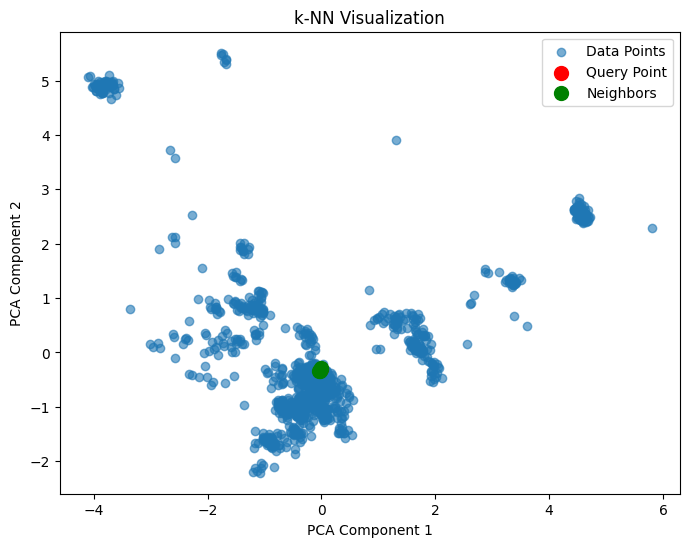

In [265]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df_expanded.loc[df_expanded["COMP"] == 1])
n_neighbors = 5
knn = NearestNeighbors(n_neighbors=n_neighbors, algorithm='brute')
knn.fit(features_scaled)
distances, indices = knn.kneighbors([features_scaled[0]])
print("Distances to neighbors:", distances)
print("Indices of neighbors:", indices)
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(features_2d[:, 0], features_2d[:, 1], label="Data Points", alpha=0.6)
query_point = features_2d[0]
neighbors = features_2d[indices[0]]
plt.scatter(query_point[0], query_point[1], color='red', label='Query Point', s=100)
plt.scatter(neighbors[:, 0], neighbors[:, 1], color='green', label='Neighbors', s=100)
plt.title('k-NN Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()